In [1]:
import sys

lib_dir = "/home/daniele/documents/github/ftt01/phd/share/lib"
sys.path.insert( 0, lib_dir )

from lib import *
import subprocess
import psycopg2
# import datetime as dt

In [2]:
class local_args():

    def __init__(self) -> None:
        pass

    def add_start_date(self,  start_date):
        self.start_date = start_date
    
    def add_end_date(self,  end_date):
        self.end_date = end_date

    def add_variable(self,  variable):
        self.variable = variable

    def add_output_path(self,  output_path):
        self.output_path = output_path
        mkNestedDir( output_path )

In [3]:
try:
    input_parser = argparse.ArgumentParser()
    input_parser.add_argument('start_date', type=str)
    input_parser.add_argument('end_date', type=str)
    input_parser.add_argument('variable', type=str)
    input_parser.add_argument('output_path', type=str)
    args = input_parser.parse_args()
except:
    args = local_args()
    args.add_start_date("2010-01-01T00:00:00")
    args.add_end_date("2019-12-31T23:59:00")
    args.add_variable("2t")
    args.add_output_path("/media/windows/projects/bias_correction/applications/era5/data/pre_processed/")

usage: ipykernel_launcher.py [-h] start_date end_date variable output_path
ipykernel_launcher.py: error: the following arguments are required: start_date, end_date, variable, output_path


In [4]:
# start_date = dt.datetime.strptime( args.start_date, '%Y-%m-%dT%H:%M:%S' )
# end_date = dt.datetime.strptime( args.end_date, '%Y-%m-%dT%H:%M:%S' )
# aggregation_at = '1H'
# dates = pd.date_range(start_date, end_date, freq=aggregation_at)

In [5]:
def get_postgres_connection():

    db_name = 'meteo'
    db_user = 'postgres'
    db_password = 'pgAifa2Bias?'
    db_host = '172.20.0.2'

    return psycopg2.connect(database=db_name, user=db_user, password=db_password, host=db_host)

In [6]:
grid_metadata = "/media/windows/projects/bias_correction/applications/era5/data/pre_processed/outputs/EGUplots/TAA_era5_points.csv"

In [7]:
def sql_to_dataframe(conn, query, column_names):

    cursor = conn.cursor()
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:
    tuples_list = cursor.fetchall()
    cursor.close()
    # Now we need to transform the list into a pandas DataFrame:
    df = pd.DataFrame(tuples_list, columns=column_names)
    return df

In [8]:
def reorder_columns_ids(df, id_type='str'):
    cols = df.columns
    cols = np.array([ int(i) for i in cols ])
    cols = cols[np.argsort(cols)]
    if id_type == 'str':
        cols = [ str(i) for i in cols ]

    return df[cols]

In [9]:
grid = pd.read_csv(grid_metadata)

In [10]:
ids = grid['id'].values

In [12]:
p_era5_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/p_era5.csv', parse_dates=True, index_col=0)
p_era5_data = reorder_columns_ids(p_era5_data)
p_era5_mean = round(p_era5_data.resample('Y').sum().mean(axis=0), 2)
p_era5_data = p_era5_data[[str(i) for i in ids]]
p_era5_data.describe()

,5,6,7,8,9,23,24,25,26,27,...,291,292,306,307,308,310,311,312,313,314
count,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,...,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000
mean,0.152397,0.154992,0.161463,0.168690,0.175431,0.174762,0.172493,0.169113,0.166551,0.165783,...,0.158906,0.162643,0.184239,0.178949,0.175282,0.171185,0.169471,0.171863,0.174708,0.177710
std,0.478650,0.499164,0.511051,0.531861,0.564770,0.476446,0.471901,0.471517,0.484459,0.495455,...,0.398534,0.399942,0.430539,0.433511,0.425778,0.420697,0.430342,0.422962,0.420270,0.427608
min,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.002000,0.001000,0.001000,0.001000,0.001000,0.004000,0.004000,0.004000,0.003000,0.002000,...,0.011000,0.012000,0.015000,0.013000,0.012000,0.011000,0.009000,0.010000,0.011000,0.012000
75%,0.059000,0.053000,0.055000,0.055000,0.051000,0.101000,0.098000,0.093000,0.082000,0.074000,...,0.125000,0.132000,0.162000,0.153000,0.148000,0.143000,0.136000,0.144000,0.150000,0.154000
max,10.671000,11.038000,10.738000,10.931000,11.144000,11.127000,9.980000,9.023000,9.340000,9.741000,...,6.167000,6.384000,7.271000,7.530000,6.845000,6.758000,7.076000,6.430000,6.739000,7.372000


In [13]:
t_era5_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/t_era5.csv', parse_dates=True, index_col=0)
t_era5_data = reorder_columns_ids(t_era5_data)
t_era5_mean = round(t_era5_data.resample('Y').mean().mean(axis=0), 2)
t_era5_data = t_era5_data[[str(i) for i in ids]]

t_era5_data.describe()

,5,6,7,8,9,23,24,25,26,27,...,291,292,306,307,308,310,311,312,313,314
count,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,...,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000
mean,12.139724,10.929679,9.831162,9.318585,9.776294,8.727478,9.711595,10.573633,10.920440,10.311440,...,0.055517,-0.695446,2.014834,0.622623,-0.545714,0.712326,0.797821,-0.456028,-1.369345,-1.409647
std,7.561320,7.520969,7.517559,7.594805,7.761938,7.670337,7.593745,7.591986,7.550568,7.493494,...,8.264560,8.194873,8.518289,8.297256,8.133533,8.314254,8.347549,8.198483,8.104541,8.069890
min,-8.729000,-9.833000,-11.209000,-13.894000,-15.259000,-15.150000,-13.071000,-12.132000,-11.699000,-12.052000,...,-26.889000,-27.337000,-27.278000,-27.719000,-27.867000,-27.523000,-27.764000,-28.115000,-28.391000,-28.322000
25%,5.720500,4.605000,3.579000,3.061000,3.411500,2.618000,3.531000,4.276000,4.622000,4.041500,...,-5.873500,-6.578500,-4.045500,-5.221000,-6.264000,-5.246000,-5.232000,-6.374000,-7.224500,-7.253000
50%,11.975000,10.794000,9.722000,9.234000,9.740000,8.715000,9.646000,10.495000,10.820000,10.221000,...,0.005000,-0.677000,1.889000,0.598000,-0.470000,0.601000,0.669000,-0.461000,-1.298000,-1.332000
75%,18.261500,16.953000,15.801500,15.310000,15.878500,14.876000,15.863000,16.763000,17.058000,16.351000,...,6.181500,5.384000,8.251000,6.687500,5.386500,6.820000,6.943500,5.592500,4.629000,4.598000
max,32.652000,32.376000,31.879000,31.706000,32.240000,29.931000,30.454000,31.224000,31.598000,31.251000,...,23.128000,22.092000,26.339000,24.296000,22.812000,24.758000,24.978000,23.139000,21.656000,21.290000


In [14]:
p_kr_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/p_krig.csv', parse_dates=True, index_col=0)
p_kr_data = reorder_columns_ids(p_kr_data)
p_kr_mean = round(p_kr_data.resample('Y').sum().mean(axis=0), 2)
p_kr_data = p_kr_data[[str(i) for i in ids]]

p_kr_data.describe()

,5,6,7,8,9,23,24,25,26,27,...,291,292,306,307,308,310,311,312,313,314
count,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,...,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000
mean,0.152836,0.161160,0.167249,0.200228,0.249511,0.174673,0.170035,0.160489,0.140246,0.143514,...,0.115017,0.117974,0.124798,0.125065,0.125509,0.120806,0.119155,0.119542,0.121489,0.121772
std,0.658882,0.695006,0.766904,0.886918,1.113164,0.753964,0.741734,0.722460,0.670013,0.660024,...,0.479837,0.456489,0.491693,0.477160,0.469710,0.437525,0.436258,0.457977,0.438280,0.431671
min,-0.027730,-0.002270,-0.038340,-0.380040,-0.103840,-0.016050,-0.158000,-0.138520,-0.014700,-0.103470,...,-0.004190,-0.004240,-0.031280,-0.014080,0.000000,0.000000,-0.001310,0.000000,-0.000060,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003940,0.001580,0.000000,0.000000,0.000000,0.003210,0.003755,0.001580,0.000720,0.000000,...,0.007015,0.015895,0.021205,0.023775,0.022065,0.024780,0.022880,0.017195,0.023270,0.025800
max,24.358040,19.855220,27.975400,25.263070,27.425930,26.428730,24.062180,28.440230,25.618830,22.073750,...,10.282980,8.790910,13.918720,13.134700,13.534360,12.806660,11.505410,11.777500,8.601110,9.163140


In [15]:
t_kr_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/t_krig.csv', parse_dates=True, index_col=0)
t_kr_data = reorder_columns_ids(t_kr_data)
t_kr_mean = round(t_kr_data.resample('Y').mean().mean(axis=0), 2)
t_kr_data = t_kr_data[[str(i) for i in ids]]

t_kr_data.describe()

,5,6,7,8,9,23,24,25,26,27,...,291,292,306,307,308,310,311,312,313,314
count,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,...,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000
mean,11.303133,11.042969,10.690128,10.319086,10.140873,9.606337,9.898070,10.781335,12.692421,12.218600,...,2.797361,2.071369,5.491335,5.225112,4.994788,6.139846,5.435665,4.187364,3.088683,4.099317
std,7.822093,7.683560,7.551332,7.413644,7.388521,7.719177,7.745478,7.773579,8.064156,7.957068,...,7.835600,7.740993,8.015880,7.856580,7.851285,8.175095,8.154016,8.041696,7.739731,7.958052
min,-12.008370,-11.769640,-11.668730,-11.493670,-12.492920,-13.485470,-13.437090,-13.178970,-12.008000,-10.837910,...,-22.330600,-21.923500,-20.721350,-20.639050,-21.002120,-19.434030,-20.266050,-21.682190,-21.252610,-20.485860
25%,5.097085,4.910160,4.665205,4.452550,4.332455,3.496605,3.742160,4.671550,6.358990,5.790260,...,-2.902680,-3.565795,-0.549690,-0.738170,-0.977675,-0.280785,-0.802605,-1.752195,-2.638560,-1.936405
50%,11.096200,10.822110,10.468390,10.092860,9.881620,9.349880,9.679690,10.556690,12.468830,12.030380,...,2.636160,1.941580,5.312560,5.056960,4.814590,5.998860,5.260230,3.984410,2.934490,3.982890
75%,17.230980,16.914080,16.502550,16.061055,15.883140,15.350460,15.734140,16.636925,18.789985,18.300890,...,8.519095,7.784925,11.376355,10.994360,10.734175,12.150960,11.369340,9.992410,8.750845,10.009185
max,34.193860,33.427610,32.943190,32.192870,31.338830,33.948340,33.224350,33.412390,35.229540,34.239090,...,27.581410,27.347840,30.012560,29.538500,30.048910,31.312430,30.370900,29.727820,26.831110,28.209920


<AxesSubplot:>

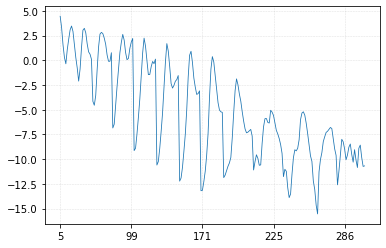

In [16]:
t_era5_data.iloc[0].plot()

<AxesSubplot:>

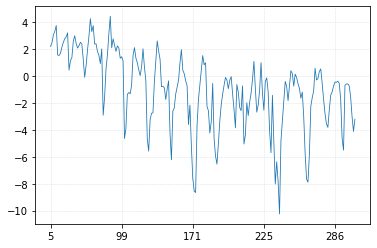

In [17]:
t_kr_data.iloc[0].plot()

<AxesSubplot:xlabel='datetime'>

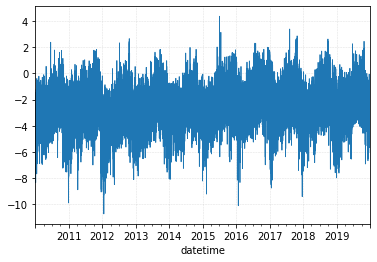

In [18]:
(t_era5_data.mean(axis=1) - t_kr_data.mean(axis=1)).plot()

<AxesSubplot:xlabel='datetime'>

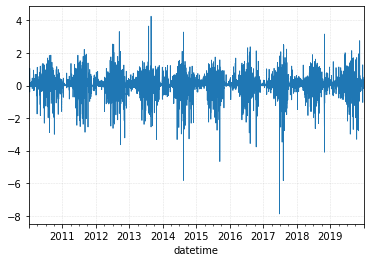

In [19]:
(p_era5_data.mean(axis=1) - p_kr_data.mean(axis=1)).plot()

In [20]:
p_bias = ( p_kr_data.resample('Y').sum() - p_era5_data.resample('Y').sum() ).mean()

In [21]:
# p_biases = []

# for i in grid.index:
#     c_id = str(int(grid.loc[i]['ID']))

#     p_biases.append(p_bias[c_id])

# grid['p_bias'] = p_biases

In [22]:
# grid.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/outputs/EGUplots/p_biases.csv')

In [23]:
p_era5_datas = []
t_era5_datas = []
p_kr_datas = []
t_kr_datas = []

for i in grid.index:
    c_id = str(int(grid.loc[i]['id']))

    p_era5_datas.append(p_era5_mean[c_id])
    t_era5_datas.append(t_era5_mean[c_id])
    p_kr_datas.append(p_kr_mean[c_id])
    t_kr_datas.append(t_kr_mean[c_id])

grid['p_era5'] = p_era5_datas
grid['t_era5'] = t_era5_datas
grid['p_kr'] = p_kr_datas
grid['t_kr'] = t_kr_datas

In [24]:
grid.set_index('id', inplace=True)

In [25]:
grid.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/outputs/EGUplots/p_t_yearly_temporal_mean.csv')

In [26]:
# p_era5_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/p_era5.csv')
# t_era5_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/t_era5.csv')
# p_kr_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/p_krig.csv')
# t_kr_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/t_krig.csv')